## Overfitting

We learned earlier that neural networks model correlation. Hidden layers in fact, create 'intermediate' correlation. However, how do we know that our networks are creating 'good' correlation? 

We experimented with Stochastic Gradient Descent by freezing one of the weights and then continued training on our neural network. Gradient Descent still found the local minima and climbed down the hill to lower ground by adjusting the rest of the weights to minimize the error. 

However, in most cases it will not be that Gradient Descent will help us climb down to the local minima which is the most optimal, instead Gradient Descent will help us find some other local minima so that the frozen weight value becomes optimal. Furthermore, if we unfroze the weight afterwards to do some more training, it wouldnt learn! That's because the error had already fallen to 0 and according to our network, there is nothing more to learn.

This should make us think: what if the frozen weight was actually of paramount importance in helping us make predictions on real world data? We wouldve essentially trained a neural network which minimzed the error but was actually useless in the real world.

This is an extremely common phenomena in neural networks and is known as **Overfitting**. The more powerful the neural network's expressive layers, the more prone the network is to overfitting. There's an everlasting battle going on in research where people continuously find tasks that need more powerful layers, but then find themselves in hard struggle to solve the problem of overfitting.

Regularization is one very important solution to the problem of overfitting.

In [1]:
import sys
import numpy as np
from keras.datasets import mnist

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.
/anaconda3/envs/jupiter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/envs/jupiter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/envs/jupiter/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/envs/jupiter/lib/python3.6/site-packages/t

In [2]:
# Loading in the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# looking at a training example [matrix]
X_train[0].shape

(28, 28)

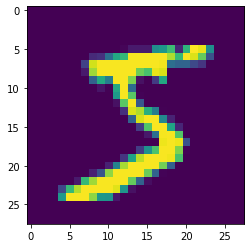

In [4]:
# Examining the image itself
plt.imshow(X_train[0])
plt.show()

For training purposes in our neural network, we must convert these image matrices of (28,28) dimensions into vectors of (1, 28x28).

In [5]:
# testing reshaping the images
X_train[0].reshape(1,28*28).shape

(1, 784)

In addition, we will also divide the image matrices by 255 in order to normalize the pixel values. A pixel is commonly stored as an 8-bit integer which has a range of possible values from 0-255. We'll do the transform for the whole dataset at a large.

In [6]:
train_images, train_labels = (X_train[:1000].reshape(1000,28*28)/255, y_train[:1000])
test_images, test_labels = (X_test.reshape(len(X_test),28*28)/255, y_test)
print(f"X_train shape: {train_images.shape} | X_test shape: {test_images.shape}")
print(f"y_train shape: {train_labels.shape} | y_test shape: {test_labels.shape}")

X_train shape: (1000, 784) | X_test shape: (10000, 784)
y_train shape: (1000,) | y_test shape: (10000,)


One hot encoding...

In [7]:
one_hot_labels = np.zeros((len(train_labels), 10)) # since there are 10 possible values
for idx, label in enumerate(train_labels):
    one_hot_labels[idx][label] = 1
print(one_hot_labels.shape)
train_labels = one_hot_labels

(1000, 10)


In [8]:
one_hot_labels = np.zeros((len(test_labels), 10)) # since there are 10 possible values
for idx, label in enumerate(test_labels):
    one_hot_labels[idx][label] = 1
print(one_hot_labels.shape)
test_labels = one_hot_labels

(10000, 10)


In [23]:
np.random.seed(1) # for reproducibility purposes

# defining the activation function (ReLU)
relu = lambda x: (x>=0) * x # returns x if x > 0, 0 otherwise
relu_d = lambda x:  x>=0 # returns 1 for x > 0, returns 0 otherwise

alpha = 0.005 # learning rate
epochs = 350
hidden_size = 40
pixels_per_image = 784
num_labels = 10

# initializing the weights

# first layer of weights
weights_0_1 = 0.2*np.random.random((pixels_per_image, hidden_size))-0.1
weights_1_2 = 0.2*np.random.random((hidden_size, num_labels))-0.1

In [11]:
for epoch in range(epochs):
    # intializing empty error variables
    error, correct_count = (0.0, 0)
    
    # iterating through the images
    for image in range(len(train_images)):
        # first layer is just the image data
        layer_0 = train_images[image:image+1]
        # second layer is the dot product of the image and weights layer
        # put through the activation function
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        # last layer is the output layer and is the dot product
        # of the hidden layer and the last set of weights
        layer_2 = np.dot(layer_1, weights_1_2)
        
        # cost function
        error += np.sum((train_labels[image:image+1] - layer_2)**2)
        # how many correct we've gotten so far
        correct_count += int(np.argmax(layer_2) == np.argmax(train_labels[image:image+1]))
        
        # backpropogation
        # output to layer 2
        layer_2_delta = (train_labels[image:image+1] - layer_2)
        # layer 2 to layer 1
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu_d(layer_1)
        
        # updating the weights
        # updating weights_1_2
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        # updating weights_0_1
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
    sys.stdout.write("\r I:"+str(epoch)+ \
                 " Train-Err:" + str(error/float(len(train_images)))[0:5] +\
                 " Train-Acc:" + str(correct_count/float(len(train_images))))

        

 I:349 Train-Err:0.108 Train-Acc:0.998

In [12]:
if(epoch % 10 == 0 or epoch == epochs-1):
    error, correct_count = (0.0, 0)

    for image in range(len(test_images)):

        layer_0 = test_images[image:image+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((test_labels[image:image+1] - layer_2) ** 2)
        correct_count += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[image:image+1]))
    sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                     " Test-Acc:" + str(correct_count/float(len(test_images))) + "\n")
    print()


 Test-Err:0.671 Test-Acc:0.7019



As we see here that our neural network performed phenomenally but had a rather lackluster performance on the test dataset. This is because our neural network grossly overfit our training data. What this means is that the neural network learned the variance in the data a bit _too_ well.

Intuitively, you can think about it that if you're learning how to drive on a particular road, rather than understand when to put the break, when to accelerate, when to shift gears, you just memorize every action you your instructor tells you take on that road based on the timestamp. So if in your first try your instructor had told you to put the break 1 minute into driving on that road, you've memorized to use the break after 1 minute of driving. You'll do really well on that road because you've memorized the instruction of how to drive _on that road_ and on that road _alone_. You'll get your license taken away on any other road.

### Dropout

One of the industry standards for regularization in deep learning is dropout. It involves randomly switching off neurons during the training process. The effect this has is that it forces other neurons to compensate and learn some other features as well while preventing the turned off neurons to learn their features a bit too much. Neurons in a large neural network are likely to overfit to noise, however, it is unlikely for them to overfit to the same noise.

In [21]:
epochs = 450
hidden_size = 100


for epoch in range(epochs):
    # intializing empty error variables
    error, correct_count = (0.0, 0)
    
    # iterating through the images
    for image in range(len(train_images)):
        # first layer is just the image data
        layer_0 = train_images[image:image+1]
        # second layer is the dot product of the image and weights layer
        # put through the activation function
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        # implementing the dropout layer
        # this creates a mask of size layer_1 with 0 or 1 values
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        # last layer is the output layer and is the dot product
        # of the hidden layer and the last set of weights
        layer_2 = np.dot(layer_1, weights_1_2)
        
        # cost function
        error += np.sum((train_labels[image:image+1] - layer_2)**2)
        # how many correct we've gotten so far
        correct_count += int(np.argmax(layer_2) == np.argmax(train_labels[image:image+1]))
        
        # backpropogation
        # output to layer 2
        layer_2_delta = (train_labels[image:image+1] - layer_2)
        # layer 2 to layer 1
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu_d(layer_1)
        # dropout mask derivative
        layer_1_delta *= dropout_mask
        
        # updating the weights
        # updating weights_1_2
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        # updating weights_0_1
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
    if(epoch%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(epoch) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(train_images)))[0:5] +\
                         " Train-Acc:" + str(correct_count/ float(len(train_images))))

        


I:0 Test-Err:0.718 Test-Acc:0.5418 Train-Err:0.885 Train-Acc:0.289
I:10 Test-Err:0.501 Test-Acc:0.7365 Train-Err:0.564 Train-Acc:0.647
I:20 Test-Err:0.478 Test-Acc:0.7621 Train-Err:0.530 Train-Acc:0.681
I:30 Test-Err:0.457 Test-Acc:0.7915 Train-Err:0.508 Train-Acc:0.71
I:40 Test-Err:0.445 Test-Acc:0.7998 Train-Err:0.492 Train-Acc:0.719
I:50 Test-Err:0.430 Test-Acc:0.8145 Train-Err:0.462 Train-Acc:0.742
I:60 Test-Err:0.446 Test-Acc:0.7974 Train-Err:0.472 Train-Acc:0.746
I:70 Test-Err:0.445 Test-Acc:0.7901 Train-Err:0.463 Train-Acc:0.744
I:80 Test-Err:0.426 Test-Acc:0.8105 Train-Err:0.461 Train-Acc:0.764
I:90 Test-Err:0.435 Test-Acc:0.7871 Train-Err:0.462 Train-Acc:0.749
I:100 Test-Err:0.433 Test-Acc:0.8039 Train-Err:0.452 Train-Acc:0.769
I:110 Test-Err:0.435 Test-Acc:0.8099 Train-Err:0.439 Train-Acc:0.778
I:120 Test-Err:0.442 Test-Acc:0.7871 Train-Err:0.451 Train-Acc:0.778
I:130 Test-Err:0.439 Test-Acc:0.811 Train-Err:0.452 Train-Acc:0.783
I:140 Test-Err:0.443 Test-Acc:0.8049 Train-Err

### Batch Gradient Descent

In [24]:
epochs = 450
hidden_size = 100
batch_size = 100
alpha = 0.001


for epoch in range(epochs):
    # intializing empty error variables
    error, correct_count = (0.0, 0)
    
    # iterating through the images
    for image in range(int(len(train_images)/batch_size)):
        batch_start, batch_end = ((image*batch_size),((image+1)*batch_size))
        # first layer is just the image data
        layer_0 = train_images[batch_start:batch_end]
        # second layer is the dot product of the image and weights layer
        # put through the activation function
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        # implementing the dropout layer
        # this creates a mask of size layer_1 with 0 or 1 values
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        # last layer is the output layer and is the dot product
        # of the hidden layer and the last set of weights
        layer_2 = np.dot(layer_1, weights_1_2)
        
        # cost function
        error += np.sum((train_labels[image:image+1] - layer_2)**2)
        for batch in range(batch_size):
            # how many correct we've gotten so far
            correct_count += int(np.argmax(layer_2[batch:batch+1]) == 
                                 np.argmax(train_labels[batch_start+batch:batch_start+batch+1]))

            # backpropogation
            # output to layer 2
            layer_2_delta = (train_labels[batch_start:batch_end] - layer_2)/batch_size
            # layer 2 to layer 1
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu_d(layer_1)
            # dropout mask derivative
            layer_1_delta *= dropout_mask

            # updating the weights
            # updating weights_1_2
            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            # updating weights_0_1
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
    if(epoch%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(epoch) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(train_images)))[0:5] +\
                         " Train-Acc:" + str(correct_count/ float(len(train_images))))

        


I:0 Test-Err:0.863 Test-Acc:0.2907 Train-Err:1.098 Train-Acc:0.136
I:10 Test-Err:0.620 Test-Acc:0.6531 Train-Err:1.081 Train-Acc:0.554
I:20 Test-Err:0.558 Test-Acc:0.694 Train-Err:1.188 Train-Acc:0.609
I:30 Test-Err:0.529 Test-Acc:0.7165 Train-Err:1.209 Train-Acc:0.638
I:40 Test-Err:0.515 Test-Acc:0.7374 Train-Err:1.230 Train-Acc:0.623
I:50 Test-Err:0.504 Test-Acc:0.746 Train-Err:1.290 Train-Acc:0.651
I:60 Test-Err:0.505 Test-Acc:0.7424 Train-Err:1.330 Train-Acc:0.672
I:70 Test-Err:0.499 Test-Acc:0.7452 Train-Err:1.310 Train-Acc:0.655
I:80 Test-Err:0.486 Test-Acc:0.7562 Train-Err:1.308 Train-Acc:0.682
I:90 Test-Err:0.490 Test-Acc:0.7437 Train-Err:1.313 Train-Acc:0.663
I:100 Test-Err:0.485 Test-Acc:0.75 Train-Err:1.319 Train-Acc:0.706
I:110 Test-Err:0.474 Test-Acc:0.7597 Train-Err:1.370 Train-Acc:0.699
I:120 Test-Err:0.479 Test-Acc:0.7557 Train-Err:1.352 Train-Acc:0.705
I:130 Test-Err:0.474 Test-Acc:0.7609 Train-Err:1.356 Train-Acc:0.701
I:140 Test-Err:0.459 Test-Acc:0.7716 Train-Err:1